# Read Auxtel Registry (SQL)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd
import sqlite3


import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [3]:
import subprocess

def du(path):
    """disk usage in human readable format (e.g. '2,1GB')"""
    #return subprocess.check_output(['du','-sh', path]).split()[0].decode('utf-8')
    return subprocess.check_output(['du','-s', path]).split()[0].decode('utf-8')

In [4]:
from datetime import datetime,date
from astropy.time import Time

In [5]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [6]:
file = "data/registry.sqlite3"

In [7]:

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect(file)
df = pd.read_sql_query("SELECT * from raw", con)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

con.close()


   id      dayObs  seqNum          visit  detector detectorName     filter  \
0   1  2019-03-05       1  2019030500001         0          S00  ????~????   
1   2  2019-03-05       2  2019030500002         0          S00  ????~????   
2   3  2019-03-05       3  2019030500003         0          S00  ????~????   
3   4  2019-03-06      11  2019030600011         0          S00  ????~????   
4   5  2019-03-06      12  2019030600012         0          S00  ????~????   

                   dateObs                     date  expTime   object  \
0  2019-03-05T18:37:15.717  2019-03-05T18:37:15.717   10.070  UNKNOWN   
1  2019-03-05T18:38:48.798  2019-03-05T18:38:48.798   10.066  UNKNOWN   
2  2019-03-05T18:41:24.811  2019-03-05T18:41:24.811   10.066  UNKNOWN   
3  2019-03-06T17:47:47.829  2019-03-06T17:47:47.829   10.068  UNKNOWN   
4  2019-03-06T18:08:44.527  2019-03-06T18:08:44.527    1.076  UNKNOWN   

  imageType  wavelength       expGroup                 obsid          expId  
0   UNKNOWN   

In [8]:
df

,id,dayObs,seqNum,visit,detector,detectorName,filter,dateObs,date,expTime,object,imageType,wavelength,expGroup,obsid,expId
0,1,2019-03-05,1,2019030500001,0,S00,????~????,2019-03-05T18:37:15.717,2019-03-05T18:37:15.717,10.070,UNKNOWN,UNKNOWN,-666,2019030500001,AT_O_20190305_000001,2019030500001
1,2,2019-03-05,2,2019030500002,0,S00,????~????,2019-03-05T18:38:48.798,2019-03-05T18:38:48.798,10.066,UNKNOWN,UNKNOWN,-666,2019030500002,AT_O_20190305_000002,2019030500002
2,3,2019-03-05,3,2019030500003,0,S00,????~????,2019-03-05T18:41:24.811,2019-03-05T18:41:24.811,10.066,UNKNOWN,UNKNOWN,-666,2019030500003,AT_O_20190305_000003,2019030500003
3,4,2019-03-06,11,2019030600011,0,S00,????~????,2019-03-06T17:47:47.829,2019-03-06T17:47:47.829,10.068,UNKNOWN,UNKNOWN,-666,2019030600011,AT_O_20190306_000011,2019030600011
4,5,2019-03-06,12,2019030600012,0,S00,????~????,2019-03-06T18:08:44.527,2019-03-06T18:08:44.527,1.076,UNKNOWN,UNKNOWN,-666,2019030600012,AT_O_20190306_000012,2019030600012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24442,24443,2021-11-04,998,2160314260390000,0,S00,FELH0600~empty,2021-11-05T08:45:42.735,2021-11-05T08:45:42.735,20.000,TIC 181887100,ENGTEST,-666,2021-11-05T08:43:46.039,AT_O_20211104_000998,2021110400998
24443,24444,2021-11-04,999,2160314260390000,0,S00,FELH0600~empty,2021-11-05T08:46:05.362,2021-11-05T08:46:05.362,20.000,TIC 181887100,ENGTEST,-666,2021-11-05T08:43:46.039,AT_O_20211104_000999,2021110400999
24444,24445,2021-11-04,1000,2160314260390000,0,S00,FELH0600~empty,2021-11-05T08:46:27.993,2021-11-05T08:46:27.993,20.000,TIC 181887100,ENGTEST,-666,2021-11-05T08:43:46.039,AT_O_20211104_001000,2021110401000
24445,24446,2021-11-04,1001,2160314260390000,0,S00,FELH0600~empty,2021-11-05T08:46:50.632,2021-11-05T08:46:50.632,20.000,TIC 181887100,ENGTEST,-666,2021-11-05T08:43:46.039,AT_O_20211104_001001,2021110401001


In [9]:
grdf=df.groupby(['dayObs','imageType']).size()


In [10]:
grdf.head()

dayObs      imageType
2019-03-05  UNKNOWN        3
2019-03-06  UNKNOWN        8
2019-03-07  UNKNOWN       32
2019-03-08  UNKNOWN      148
2019-03-09  BIAS          20
dtype: int64

In [11]:
grdf.tail()

dayObs      imageType
2021-11-04  BIAS          50
            DARK          10
            ENGTEST      287
            FLAT          55
            SKYEXP       600
dtype: int64

In [16]:
grdf["2021-11-04"]["SKYEXP"]

600

In [18]:
list_of_days=df["dayObs"].values
list_of_days

array(['2019-03-05', '2019-03-05', '2019-03-05', ..., '2021-11-04',
       '2021-11-04', '2021-11-04'], dtype=object)

In [21]:
indexes = np.where(list_of_days> '2021-06-01')[0]


array([14220, 14221, 14222, ..., 24444, 24445, 24446])

In [23]:
list_of_selected_days=list_of_days[indexes]

In [28]:
N=len(list_of_selected_days)

In [24]:
types = np.array(["BIAS","DARK","FLAT","ENGTEST","SKYEXP"])

In [37]:
bias_count =np.zeros(N)
dark_count =np.zeros(N)
flat_count =np.zeros(N)
engtest_count =np.zeros(N)
skyexp_count =np.zeros(N)

for idx,daytag in np.ndenumerate(list_of_selected_days):
    idx0=idx[0]
    try:
        bias_count[idx0]=grdf[daytag]["BIAS"]
    except:
        bias_count[idx0]=0
        
        
    try:
        dark_count[idx0]=grdf[daytag]["DARK"]
    except:
        dark_count[idx0]=0  
        
    try:
        flat_count[idx0]=grdf[daytag]["FLAT"]
    except:
        flat_count[idx0]=0  

    try:
        engtest_count[idx0]=grdf[daytag]["ENGTEST"]
    except:
        engtest_count[idx0]=0  

        
    try:
        skyexp_count[idx0]=grdf[daytag]["SKYEXP"]
    except:
        skyexp_count[idx0]=0  
        

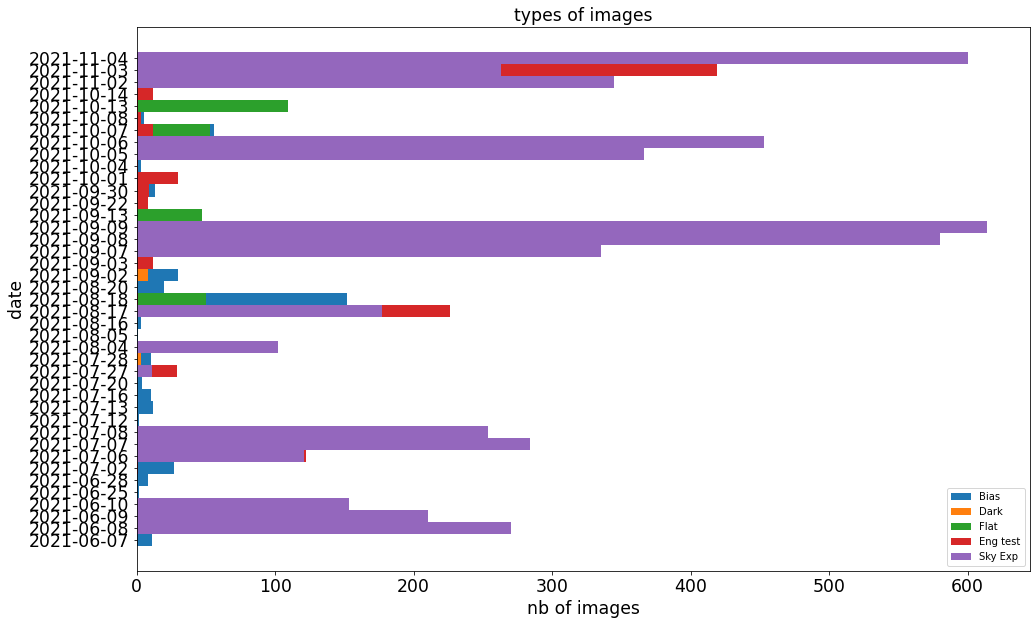

In [44]:
width = 1  
fig, ax = plt.subplots(figsize=(16,10))
ax.barh(list_of_selected_days, bias_count, width, label='Bias')
ax.barh(list_of_selected_days, dark_count, width, label='Dark')
ax.barh(list_of_selected_days, flat_count, width, label='Flat')
ax.barh(list_of_selected_days, engtest_count, width, label='Eng test')
ax.barh(list_of_selected_days, skyexp_count, width, label='Sky Exp')

ax.set_xlabel('nb of images')
ax.set_ylabel('date')
ax.set_title('types of images')
ax.legend()

plt.show()
